In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
sublist=['ec105', 'ec106', 'ec107', 'ec108', 'ec109']
# sublist=['ec108']
phase='refresh'
all=pd.DataFrame()
for sub in sublist:
    file='data/' + sub + phase + 'eyebehave.csv'
    print(file)
    eye=pd.read_csv(file, index_col=0)
    all=pd.concat([all,eye])
all.columns

data/ec105refresheyebehave.csv
data/ec106refresheyebehave.csv
data/ec107refresheyebehave.csv
data/ec108refresheyebehave.csv
data/ec109refresheyebehave.csv


Index(['block', 'cond', 'duration', 'end', 'endloc', 'event', 'loc1end',
       'loc1start', 'loc1x', 'loc1y', 'loc2end', 'loc2start', 'loc2x', 'loc2y',
       'loc3end', 'loc3start', 'loc3x', 'loc3y', 'objonset', 'recog loc',
       'recog order', 'refresh order', 'same/diff', 'start', 'startloc',
       'study order', 'sub', 'trialend', 'trialnum', 'xend', 'xstart', 'yend',
       'ystart'],
      dtype='object')

In [56]:
roimask=all['startloc']=='offscreen'
all_roi=all[~roimask]
fix=all_roi[all_roi['event']=='EFIX']
fix=fix[fix['duration']>80]
fix=fix[fix['recog loc']>0]

In [159]:
rois=['loc1start', 'loc2start', 'loc3start', 'screen']
roi_prop_dict={}
roi_prop_list=[]
for row, ldf in fix.groupby(['sub', 'trialnum', 'cond', 'recog loc']):
    roi_sum = ldf['duration'].sum()
    for roi in rois:
        loc_ldf = ldf[ldf['startloc']==roi]
        loc_dur = loc_ldf['duration'].sum()
        loc_prop = loc_dur/roi_sum
        roi_prop_dict = {'sub':ldf['sub'].iloc[0], 'cond':ldf['cond'].iloc[0], 'trial':ldf['trialnum'].iloc[0], 
                         'recog loc':ldf['recog loc'].iloc[0],
                         'all_roi_dur':roi_sum, 'roi':roi, 'roi_dur':loc_dur, 'roi_prop':loc_prop, 
                         'roi_num':loc_ldf.shape[0]}
        roi_prop_list.append(roi_prop_dict)
roi_fix_tidy=pd.DataFrame(roi_prop_list)
roi_fix_tidy

,all_roi_dur,cond,recog loc,roi,roi_dur,roi_num,roi_prop,sub,trial
0,1202,1.0,1.0,loc1start,0,0,0.000000,ec105,1
1,1202,1.0,1.0,loc2start,0,0,0.000000,ec105,1
2,1202,1.0,1.0,loc3start,0,0,0.000000,ec105,1
3,1202,1.0,1.0,screen,1202,7,1.000000,ec105,1
4,3900,2.0,1.0,loc1start,3900,4,1.000000,ec105,2
5,3900,2.0,1.0,loc2start,0,0,0.000000,ec105,2
6,3900,2.0,1.0,loc3start,0,0,0.000000,ec105,2
7,3900,2.0,1.0,screen,0,0,0.000000,ec105,2
8,4556,2.0,1.0,loc1start,4556,2,1.000000,ec105,3
9,4556,2.0,1.0,loc2start,0,0,0.000000,ec105,3


In [58]:
sub_fix_list = []
for row, ldf in roi_fix_tidy.groupby(['sub', 'cond', 'roi', 'recog loc']):
    roi_num_mean=ldf['roi_num'].mean()
    roi_dur_mean=ldf['roi_dur'].mean()
    roi_prop_mean=ldf['roi_prop'].mean()
    sub_fix_dict = {'sub':row[0], 'cond':row[1], 'roi':row[2], 'recog loc':row[3],
                   'roi_num_mean':roi_num_mean, 'roi_dur_mean':roi_dur_mean, 'roi_prop_mean':roi_prop_mean}
    sub_fix_list.append(sub_fix_dict)
sub_fix_tidy=pd.DataFrame(sub_fix_list)

In [60]:
sublist=['ec105', 'ec106', 'ec107', 'ec108', 'ec109']
# sublist=['ec108']

all_behave=pd.DataFrame()
for sub in sublist:
    file='data/' + sub + 'behave.csv'
    print(file)
    behave=pd.read_csv(file, index_col=0)
    behave['sub']=sub
    all_behave=pd.concat([all_behave,behave])
all_behave=all_behave[all_behave['recog loc']!=-1]

data/ec105behave.csv
data/ec106behave.csv
data/ec107behave.csv
data/ec108behave.csv
data/ec109behave.csv


In [157]:
locs=[1, 2, 3]
recog_prop_dict={}
recog_prop_list=[]
for row, ldf in all_behave.groupby(['sub', 'cond']):
    for loc in locs:
        loc_ldf = ldf[ldf['recog loc']==loc]
        loc_prop = loc_ldf['recog loc'].count()/ldf.shape[0]
        
        recog_prop_dict = {'sub':row[0], 'cond':row[1], 'recog loc':loc, 'loc_prop':loc_prop}
        recog_prop_list.append(recog_prop_dict)
recog_prop_df=pd.DataFrame(recog_prop_list)

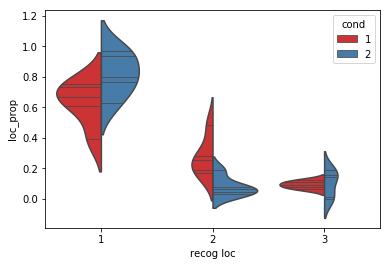

In [154]:
sns.violinplot(x="recog loc", y="loc_prop", hue='cond', data=recog_prop_df, 
               split=True, inner="stick", palette="Set1")

(0, 1)

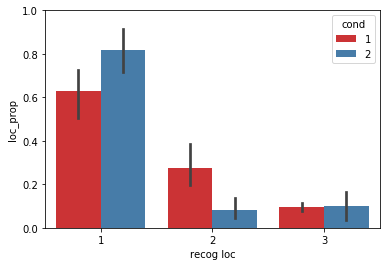

In [149]:
sns.barplot(x="recog loc", y="loc_prop", hue='cond', data=recog_prop_df, palette="Set1")
plt.ylim([0,1])

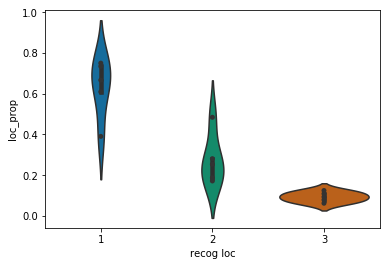

In [140]:
ax = sns.violinplot(x="recog loc", y="loc_prop", data=recog_prop_df[recog_prop_df['cond']==1], palette="colorblind")
ax = sns.stripplot(x="recog loc", y="loc_prop", data=recog_prop_df[recog_prop_df['cond']==1], color='.2')

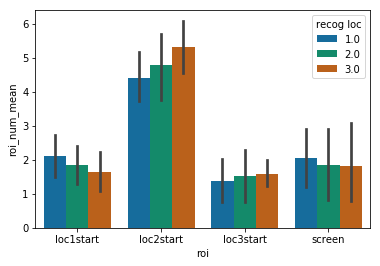

In [139]:
sns.barplot(x='roi', y='roi_num_mean', data=sub_fix_tidy[sub_fix_tidy['cond']==1], hue='recog loc', 
            palette='colorblind')

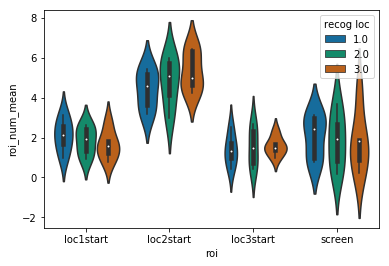

In [141]:
sns.violinplot(x="roi", y="roi_num_mean", hue='recog loc', data=sub_fix_tidy[sub_fix_tidy['cond']==1], 
               palette="colorblind")

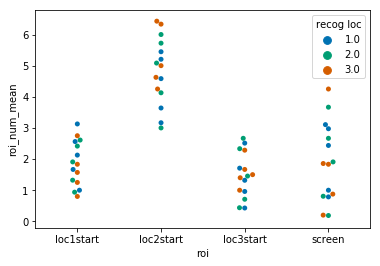

In [155]:
sns.swarmplot(x="roi", y="roi_num_mean", hue='recog loc', data=sub_fix_tidy[sub_fix_tidy['cond']==1], 
               palette="colorblind")

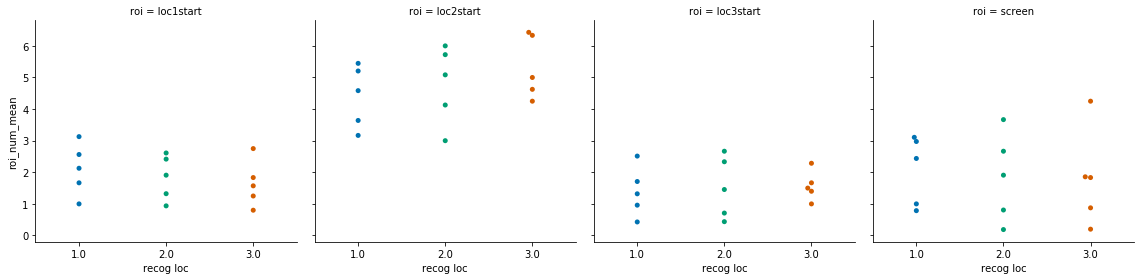

In [142]:
sns.factorplot(x="recog loc", y="roi_num_mean", col="roi", 
               data=sub_fix_tidy[sub_fix_tidy['cond']==1], kind="swarm", palette='colorblind');

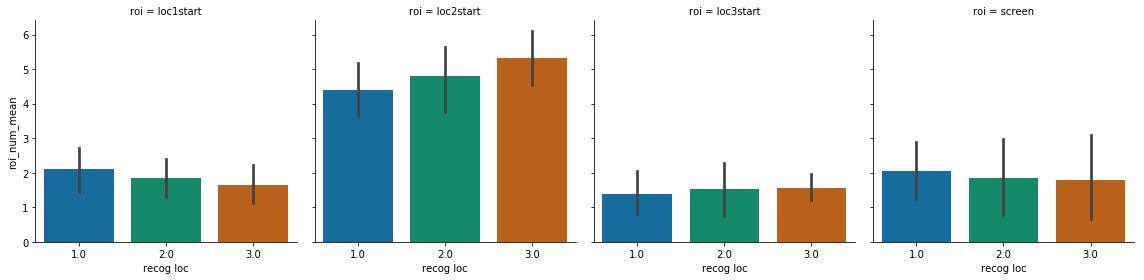

In [143]:
sns.factorplot(x="recog loc", y="roi_num_mean", col="roi", data=sub_fix_tidy[sub_fix_tidy['cond']==1], 
               kind="bar", palette='colorblind');

In [ ]:
sub='ec108'
subdf=all[(all['sub']==sub) & (all['refresh order']==30) ]
print(subdf['cond'])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(subdf.xstart, subdf.ystart, marker='.', alpha=0.3)
ax.plot(subdf.xstart, subdf.ystart, marker='.', alpha=0.3)
ax.scatter(subdf.loc1x, subdf.loc1y, marker='*', c='cyan')
ax.scatter(subdf.loc2x, subdf.loc2y, marker='*', c='red')
ax.scatter(subdf.loc3x, subdf.loc3y, marker='*', c='green')
plt.xlim(0, 1920)
plt.ylim(0, 1080)
# plt.savefig('figs/eye_path_ec108_tr30_recog.eps', format='eps', dpi=1000)